In [1]:
import pandas as pd
import inpoly
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u

In [2]:
dsph_prop = pd.read_csv("dSph_property.csv",index_col=0)
dsph_prop

,RAh,RAm,RAs,pmDEd,DEm,DEs,DIST,err_DIST,HLR,RAdeg,DEdeg
Draco,17,20,12.0,57,54,55,76000.0,6000.0,221.0,260.050000,57.915278
Sculptor,1,0,9.4,−33,42,33,86000.0,6000.0,NaN,15.039167,-33.709167


In [3]:
sculptor = dsph_prop.loc["Sculptor"]

In [80]:
df = pd.read_csv("data/des_photometry_wide.csv",comment="#")
df = df[df.VALID_des_to_sdss]
df

,TILENAME,COADD_OBJECT_ID,RAP,DECP,PSF_G,PSF_R,PSF_I,PSF_Z,PSF_Y,PSFERR_G,...,G_SDSS,R_SDSS,I_SDSS,Z_SDSS,VALID_des_to_sdss,Johnson_V-I,Johnson_I,Johnson_V,Walker_V-I,Walker_V
0,DES0100-3332,290851860,15.149678,-33.608539,21.048174,20.516516,20.338427,20.250843,20.238480,0.008526,...,21.086310,20.561611,20.342831,20.227299,True,0.887249,19.879488,20.766738,0.993976,20.894121
1,DES0100-3332,290902864,14.948569,-33.799170,20.492231,19.890329,19.673502,19.586229,19.578220,0.005513,...,20.536361,19.943086,19.681965,19.565796,True,0.975742,19.200587,20.176329,1.082469,20.303712
2,DES0100-3332,290902898,15.066740,-33.799200,20.672838,20.052601,19.844166,19.758438,19.764355,0.006311,...,20.717515,20.106057,19.853031,19.738288,True,0.958823,19.387932,20.346755,1.065550,20.474138
3,DES0100-3332,290863074,14.972998,-33.652606,21.564535,20.986811,20.798199,20.723984,20.663744,0.014250,...,21.605784,21.035884,20.804632,20.702055,True,0.913317,20.346226,21.259543,1.020044,21.386926
4,DES0100-3332,290891364,14.832268,-33.756092,21.679661,21.203911,21.065737,20.997345,20.870787,0.014665,...,21.712527,21.242270,21.067097,20.971066,True,0.796110,20.628965,21.425075,0.902837,21.552458
6,DES0100-3332,290851267,14.856112,-33.601897,22.166142,21.292196,20.962902,20.865948,20.710932,0.020302,...,22.231420,21.371984,20.990755,20.856488,True,1.226768,20.487584,21.714353,1.333495,21.841736
7,DES0100-3332,290851282,15.016100,-33.602184,21.665573,21.187801,21.027287,20.966057,20.800673,0.013814,...,21.699779,21.227873,21.029375,20.940474,True,0.844861,20.566493,21.411354,0.951588,21.538737
8,DES0100-3332,290852098,15.389304,-33.611089,18.554823,17.107935,15.993189,15.539227,15.423202,0.001946,...,18.694813,17.283218,16.152803,15.568536,True,2.792567,15.059404,17.851972,2.899294,17.979355
9,DES0100-3332,290854330,15.185456,-33.618196,22.634895,21.548515,21.055941,20.797997,20.593885,0.032210,...,22.720838,21.654716,21.110372,20.799260,True,1.567679,20.514147,22.081826,1.674406,22.209209
10,DES0100-3332,290854409,14.933911,-33.616348,21.285255,20.671286,20.482901,20.385099,20.340803,0.011522,...,21.328485,20.722891,20.490714,20.364199,True,0.915251,20.045934,20.961185,1.021978,21.088568


In [81]:
poly = pd.read_csv("CMD_cut_ours.csv",header=None)
poly = poly.rename(columns={0:"x",1:"y"})

df["inCMDcut"] = inpoly.inpoly(sx=df["Walker_V-I"].values,sy=df["Walker_V"].values,x=poly.x.values[:-1],y=poly.y.values[:-1])

[[ 1.33007335  1.1002445   0.7         1.17        1.29894503  1.54514172]
 [17.58606557 18.48360656 20.5        20.5        18.75688752 17.49749545]]
[[ 1.1002445   0.7         1.17        1.29894503  1.54514172  1.33007335]
 [18.48360656 20.5        20.5        18.75688752 17.49749545 17.58606557]]


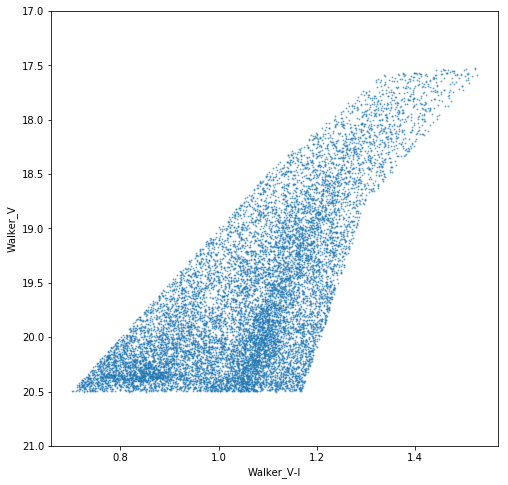

In [88]:
df[df.inCMDcut].plot.scatter("Walker_V-I","Walker_V",s=1,alpha=0.5,figsize=(8,8))
plt.ylim([21,17])
plt.show()

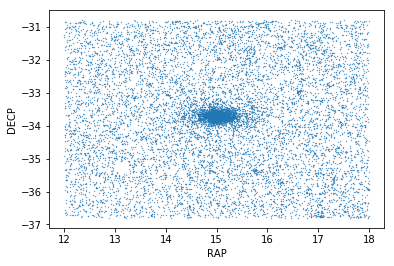

In [90]:
df[df.inCMDcut].plot.scatter("RAP","DECP",s=0.1)
plt.show()

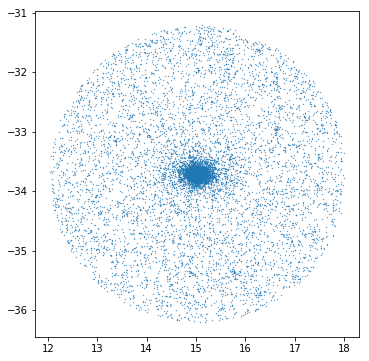

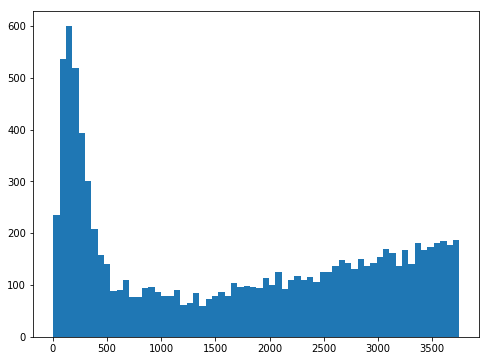

In [103]:
pos = coord.SkyCoord(
    ra=df[df.inCMDcut].RAP.values*u.deg,
    dec=df[df.inCMDcut].DECP.values*u.deg,
    distance=sculptor.DIST*u.pc
)
center0 = coord.SkyCoord(
    ra=sculptor.RAdeg*u.deg,
    dec=sculptor.DEdeg*u.deg,
    distance=sculptor.DIST*u.pc
)
sep = pos.separation(center0)
sep_deg = sep.deg
sep_pc = sculptor.DIST*np.sin(sep.rad)

pos = pos[sep_deg<2.5]

sep = pos.separation(center0)
sep_deg = sep.deg
sep_pc = sculptor.DIST*np.sin(sep.rad)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(pos.ra.deg,pos.dec.deg,s=0.1)
ax.set_aspect(1/np.cos(sculptor.DEdeg*(np.pi/180)))
plt.show()
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.hist(sep_pc,bins=64)
plt.show()

In [94]:
pos.ra.min().deg,pos.ra.max().deg

(12.04127807, 17.993348100000002)

In [95]:
pos.dec.min().deg,pos.dec.max().deg

(-36.20275672, -31.210623)

In [96]:
#update likelihood
import dSph_model
class KI17_loglikelihood_mod:
    def __init__(self,data,center0,beta=1):
        self.data = data
        self.center0 = center0
        self.RoI_R = np.max(self.Rs(0,0)) # use Rs.max as the RoI
        self.beta = beta
        #print(self.Rs(0,0).describe())
        print("beta: {}".format(self.beta)) if beta != 1 else None
        self.mem = dSph_model.plummer_model(re_pc=200)
        self.fg = dSph_model.uniform2d_model(Rmax_pc=self.RoI_R)

    def Rs(self,dra0,dde0):
        center = coord.SkyCoord(ra=self.center0.ra+dra0*u.deg,dec=self.center0.dec+dde0*u.deg,distance=self.center0.distance)
        return self.center0.distance.pc*np.sin(self.data.separation(center).rad)
        
    def __call__(self,prms):
        return np.sum(self.loglikelis(*prms))
    
    def loglikeli(self,re,odds,dra0,dde0):
        return np.sum(self.loglikelis(re,odds,dra0,dde0))
    
    def loglikelis(self,re,odds,dra0,dde0):
        if re<0 or odds<0:
            return -np.inf
        else:
            mem,fg = self.mem,self.fg
            mem.update({"re_pc":re})
            ref_R = self.mem.half_light_radius() # 1.67834699001666*re for sersic model
            
            C1 = 1/mem.cdf_R(self.RoI_R)
            C0 = fg.density_2d(self.RoI_R) # fg.density_2d returns constant for arbitrary input
            #s = C0/(sigmafg*mem.density_2d(self.Rs)*C1 + C0)
            #s = C0/(sigmafg*mem.density_2d(self.Rs)*C1)
            s = 1/(1+ 1/odds * mem.density_2d(ref_R)/mem.mean_density_2d(self.RoI_R))
            #print("mem.density2d:",mem.density_2d(ref_R))
            #print("mem.mean_density2d:",mem.mean_density_2d(self.RoI_R))
            
            Rs = self.Rs(dra0,dde0)
            ret = np.log(s*C1*mem.density_2d(Rs)+(1-s)*C0)

            return self.beta * ret


In [97]:
scl = dsph_prop.loc["Sculptor"]
lnlikeli = KI17_loglikelihood_mod(data=pos,center0=center0)

In [98]:
lnlikeli([200,6,0,0])

-162805.4480457892

In [99]:
import emcee

nwalkers = 32

initial_state_re = np.random.rand(nwalkers)*1000
initial_state_odds = np.random.rand(nwalkers)*50
initial_state_dra0 = np.random.rand(nwalkers)*0.5
initial_state_dde0 = np.random.rand(nwalkers)*0.5
initial_state = np.array([initial_state_re,initial_state_odds,initial_state_dra0,initial_state_dde0]).T

sampler = emcee.EnsembleSampler(nwalkers=nwalkers, dim=4, lnpostfn=lnlikeli, threads=16)
pos, prob, state = sampler.run_mcmc(initial_state,100) # burnin
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos,100) # burnin
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos,100) # burnin
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos,100) # burnin
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos,100) # burnin
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos,1000)

re           226.205779
odds          40.232976
dra0          -0.018174
dde0          -0.003898
lnprob   -160069.789228
Name: 1783, dtype: float64

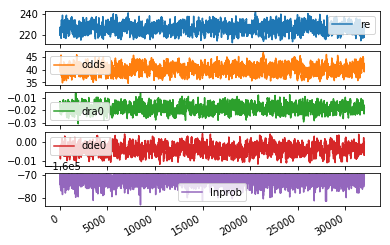

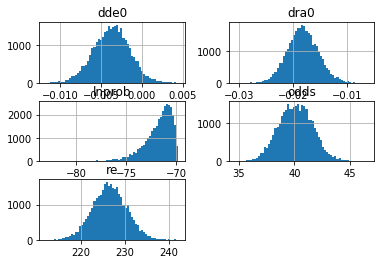

In [100]:
res = pd.DataFrame(sampler.flatchain)
res = res.rename(columns={0:"re",1:"odds",2:"dra0",3:"dde0"})
res["lnprob"] = sampler.flatlnprobability
res.plot(subplots=True)
res.hist(bins=64)
mlp = res.iloc[res.lnprob.idxmax()]
mlp

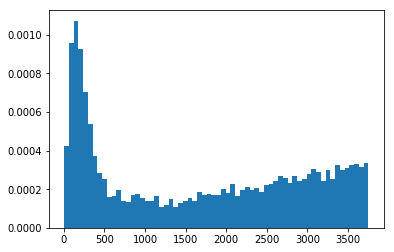

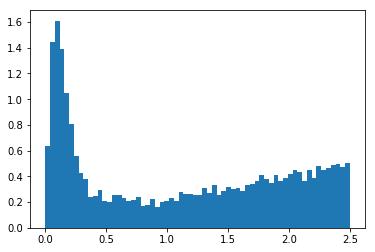

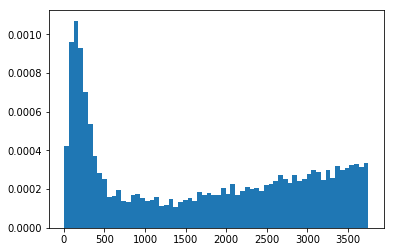

In [124]:
plt.hist(sep_pc,bins=64,density=True)
plt.show()
plt.hist(sep_deg,bins=64,density=True)
#plt.plot(dSph_model.plummer_model.)
plt.show()
plt.hist(pos.separation_3d(center0).pc,density=True,bins=64)
plt.show()

In [105]:
lnlikeli.RoI_R

3750.7857020329498

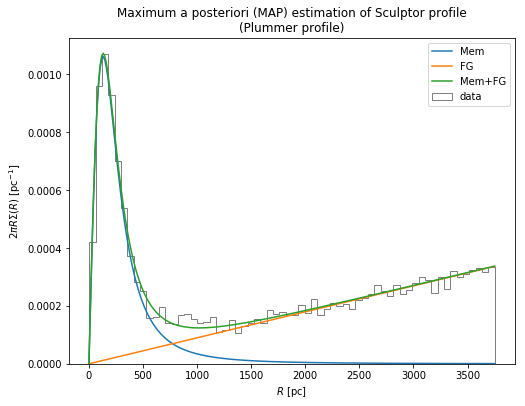

In [197]:
import sympy
from sympy.utilities.autowrap import ufuncify
sympy.init_printing()

R,re = sympy.symbols("R r_e",positive=True)
plummer = (1/sympy.pi/re**2)*(1+(R/re)**2)**(-2)
#plummer,plummer.subs(R,re)

npre,odds = mlp.re,mlp.odds
flat = 1/odds*plummer.subs(R,re)
RoI_R = lnlikeli.RoI_R
f1 = (flat*(2*sympy.pi*R))
f2 = (plummer*(2*sympy.pi*R))
norm = sympy.simplify(sympy.integrate(f1,R) + sympy.integrate(f2,R))
norm = sympy.N(norm.subs(R,RoI_R) - norm.subs(R,0))
f1=f1.subs({re:npre})
f2=f2.subs({re:npre})
norm=norm.subs({re:npre})
#norm

npR = np.linspace(0,RoI_R,256)
f1np = ufuncify([R], f1/norm)
f1np = f1np(npR)
f2np = ufuncify([R], f2/norm)
f2np = f2np(npR)
ftotnp = f1np+f2np

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.hist(
    pos.separation_3d(center0).pc,
    density=True,bins=64,histtype="step",color="gray",
    label="data"
)
ax.plot(npR,f2np,label="Mem")
ax.plot(npR,f1np,label="FG")
ax.plot(npR,ftotnp,label="Mem+FG")
ax.set_title("Maximum a posteriori (MAP) estimation of Sculptor profile\n(Plummer profile)")
#ax.text(1,1,"hoge")
ax.set_xlabel(r"$R$ [pc]")
ax.set_ylabel(r"$2\pi R\Sigma(R)\ [\mathrm{pc}^{-1}]$")
ax.legend()
plt.show()

AttributeError: 'XAxis' object has no attribute 'get_maxpos'